*****Análisis de los datos históricos de existencias/ingresos y creación de un cuadro de mando*****

In [1]:
!pip install yfinance
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 149.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 185.1 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import pandas as pd

**Pregunta 1: Utilice yfinance para extraer datos bursátiles**

In [4]:
tesla = yf.Ticker("TSLA")
tesla_data_price = tesla.history(period="max")
tesla_data_price.reset_index(inplace=True)
print(tesla_data_price.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [5]:
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly

**Pregunta 2: Utilizar Webscraping para extraer datos de ingresos de Tesla**

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

#En internet me dice que tenia que simular un navegador real con headers.
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all("table")

print(f"Tablas encontradas: {len(tables)}")
tesla_revenue = pd.read_html(str(tables[1]))[0]
tesla_revenue.columns = ["Year", "Revenue"]

print(tesla_revenue.tail())

Tablas encontradas: 6
          Year Revenue
58  2010-06-30     $28
59  2010-03-31     $21
60  2009-12-31     NaN
61  2009-09-30     $46
62  2009-06-30     $27


**Pregunta 3: Utilice yfinance para extraer datos bursátiles**

In [8]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


**Pregunta 4: Utilizar Webscraping para extraer datos de ingresos de la GME**

In [13]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all("table")
print(f"Tablas encontradas: {len(tables)}")

gme_revenue = pd.read_html(str(tables[1]))[0]
gme_revenue.columns = ["Fecha", "Ingresos"]


print(gme_revenue.tail())

Tablas encontradas: 6
         Fecha Ingresos
59  2010-01-31   $3,524
60  2009-10-31   $1,835
61  2009-07-31   $1,739
62  2009-04-30   $1,981
63  2009-01-31   $3,492


In [14]:
import matplotlib.pyplot as plt

**Pregunta 5: Representar gráficamente las acciones de Tesla**

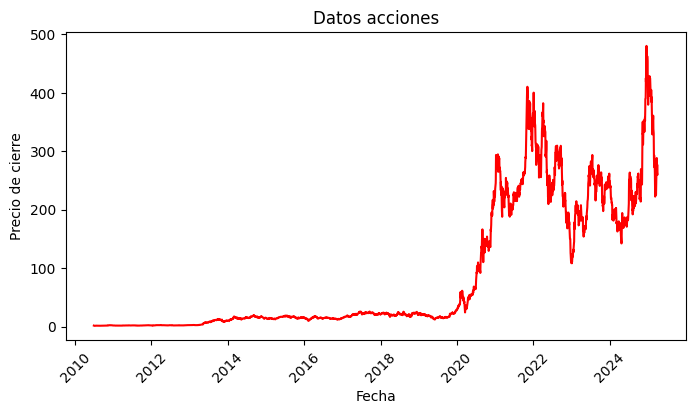

In [16]:
def make_graph(data, title):
    data["Date"] = pd.to_datetime(data["Date"])
    plt.figure(figsize=(8,4))
    plt.plot(data["Date"], data["Close"], label="Cierre", color="red")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de cierre")
    plt.title(title)  # Usamos el título que pasaste como parámetro
    plt.xticks(rotation=45)
    plt.show()

make_graph(tesla_data_price, "Datos acciones")

**Pregunta 6: Representar gráficamente las acciones de GameStop**

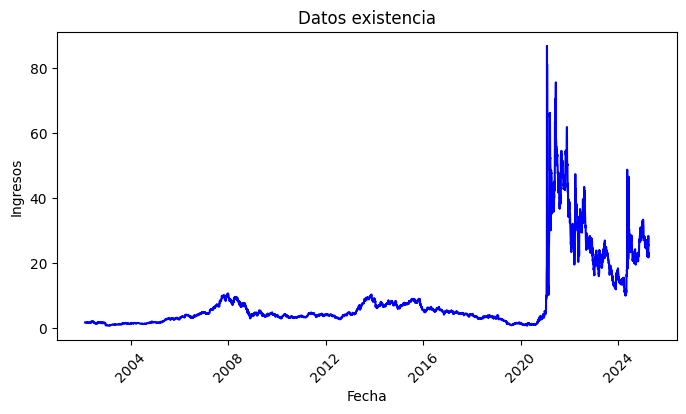

In [17]:
def make_graph(data, title):
    data["Date"] = pd.to_datetime(data["Date"])
    plt.figure(figsize=(8,4))
    plt.plot(data["Date"], data["Close"], label="Cierre", color="blue")
    plt.xlabel("Fecha")
    plt.ylabel("Ingresos")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

make_graph(gme_data, "Datos existencia")